In [ ]:
!sudo apt-get update -y
!sudo apt-get install python3.10-venv -y

!python3.10 -m venv myenv
!./myenv/bin/python --version
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 2
!sudo update-alternatives --config python3
!curl -sS https://bootstrap.pypa.io/get-pip.py | sudo python3.10

!sudo apt-get update -y
!sudo apt-get install python3.10 python3.10-distutils python3.10-venv -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 2
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.12 1
!sudo update-alternatives --config python3

!python --version
!pip --version


Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,123 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,821 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/unive

In [ ]:
!pip install -r requirements.txt



ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [ ]:
from google.colab import files
files.upload()

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset   16KB  2025-10-01 16:35:53          18150        618  1.0              
jaderz/hospital-beds-management                                 Hospital Beds Management                            46KB  2025-10-03 09:21:58          15321        356  1.0              
ahmadrazakashif/bmw-worldwide-sales-records-20102024            BMW Worldwide Sales Records (2010–2024)            833KB  2025-09-20 14:39:45          19882        394  1.0              
umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr  E

In [ ]:
! kaggle datasets download -d 'emmarex/plantdisease'

 98% 642M/658M [00:04<00:00, 157MB/s]
100% 658M/658M [00:04<00:00, 168MB/s]


In [ ]:
!unzip plantdisease.zip -d ./plant_disease_data


Streaming output truncated to the last 5000 lines.
  inflating: ./plant_disease_data/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: ./plant_disease_data/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: ./plant_disease_data/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: ./plant_disease_data/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: ./plant_disease_data/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: ./plant_disease_data/plantvillage/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GR

In [ ]:
import os
import shutil
m_path="/content/plant_disease_data/PlantVillage"
tomato_path="/content/tomato"
os.makedirs(tomato_path,exist_ok=True)

for folder in os.listdir(m_path):
  if folder.startswith("Tomato"):
    shutil.move(os.path.join(m_path, folder), os.path.join(tomato_path, folder))

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


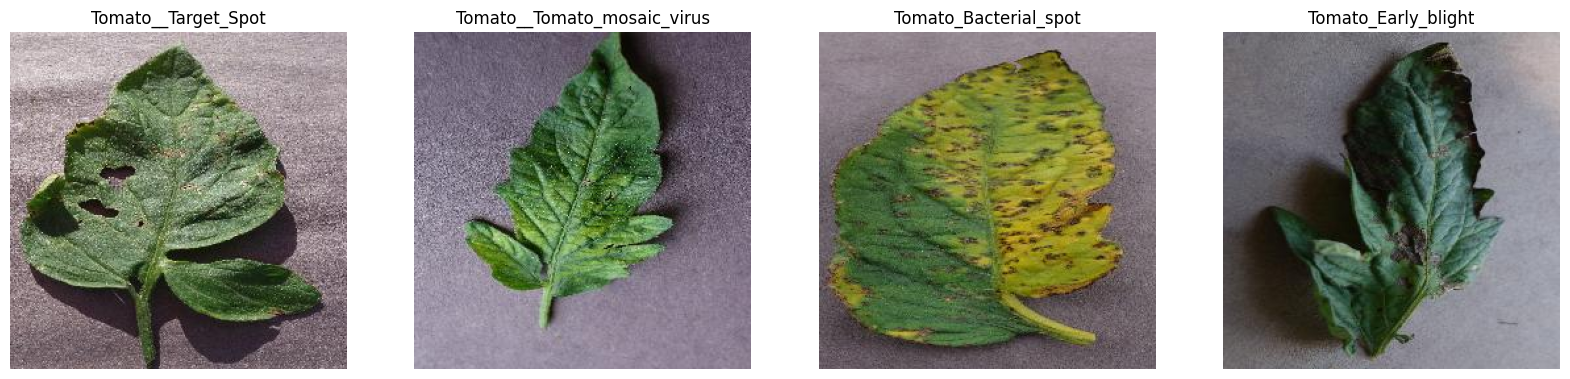

In [ ]:
import cv2
base_path = '/content/tomato'
categories = os.listdir(base_path)

plt.figure(figsize=(20,6))
for i, cat in enumerate(categories[:4]):
    path = os.path.join(base_path, cat)
    if os.path.isdir(path):
        img_files = os.listdir(path)
        if img_files:
            img = cv2.imread(os.path.join(path, img_files[0]))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1,4,i+1)
            plt.imshow(img)
            plt.title(cat)
            plt.axis('off')
plt.show()

In [ ]:
data_dir="/content/tomato"
base_dir="/content/tomato_split"

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

In [ ]:
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = os.listdir(class_path)
    images = [os.path.join(class_path, img) for img in images]

    train_imgs, temp_imgs = train_test_split(images, test_size=0.3, random_state=42)
    # Second split → validation & test (from temp)
    val_imgs, test_imgs = train_test_split(temp_imgs, test_size=0.33, random_state=42)  # 0.33 of 0.3 = ~10%

    # Create class folders inside each split directory
    for split_name, split_imgs in zip(['train', 'val', 'test'], [train_imgs, val_imgs, test_imgs]):
        split_class_dir = os.path.join(base_dir, split_name, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

        # Copy files
        for img_path in split_imgs:
            shutil.copy(img_path, split_class_dir)


In [ ]:
for folder in ['train', 'val', 'test']:
    path = os.path.join(base_dir, folder)
    print(folder, ":", sum([len(files) for _, _, files in os.walk(path)]))


train : 11204
val : 3218
test : 1590


In [ ]:
train_dir = "/content/tomato_split/train"
val_dir = "/content/tomato_split/val"
test_dir = "/content/tomato_split/test"


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.13.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


In [ ]:
!pip show keras

Name: keras
Version: 2.13.1
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
)
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),   # resize all images
    batch_size=32,
    class_mode='categorical'  # since multiple classes
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False              # important: don’t shuffle for evaluation
)


Found 11203 images belonging to 10 classes.
Found 3218 images belonging to 10 classes.
Found 1590 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_data.num_classes, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    batch_size=32,
    verbose=1
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 72s 183ms/step - accuracy: 0.3990 - loss: 1.8168 - val_accuracy: 0.5876 - val_loss: 1.2017
Epoch 2/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 60s 170ms/step - accuracy: 0.7633 - loss: 0.6906 - val_accuracy: 0.6454 - val_loss: 1.1553
Epoch 3/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 169ms/step - accuracy: 0.8239 - loss: 0.5088 - val_accuracy: 0.6927 - val_loss: 0.9847
Epoch 4/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 58s 166ms/step - accuracy: 0.8479 - loss: 0.4280 - val_accuracy: 0.8142 - val_loss: 0.5548
Epoch 5/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 160ms/step - accuracy: 0.8762 - loss: 0.3671 - val_accuracy: 0.7918 - val_loss: 0.6854
Epoch 6/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.8828 - loss: 0.3261 - val_accuracy: 0.8216 - val_loss: 0.5614
Epoch 7/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 157ms/step - accuracy: 0.8969 - loss: 0.3056 - val_accuracy: 0.8073 - val_loss: 0.6711
Epoch 8/20
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 156ms/step - accuracy: 0.9052 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")



50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8494 - loss: 0.5698
Test Accuracy: 86.29%
Test Loss: 0.6466


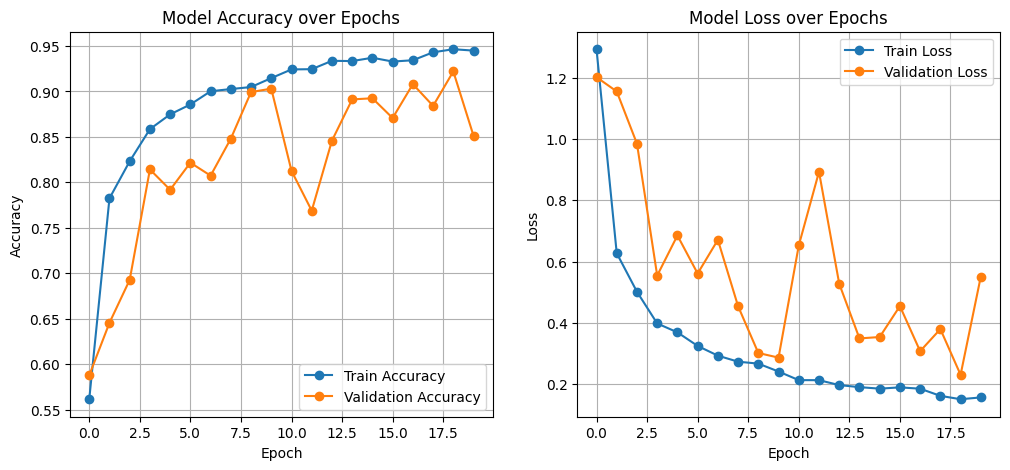

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


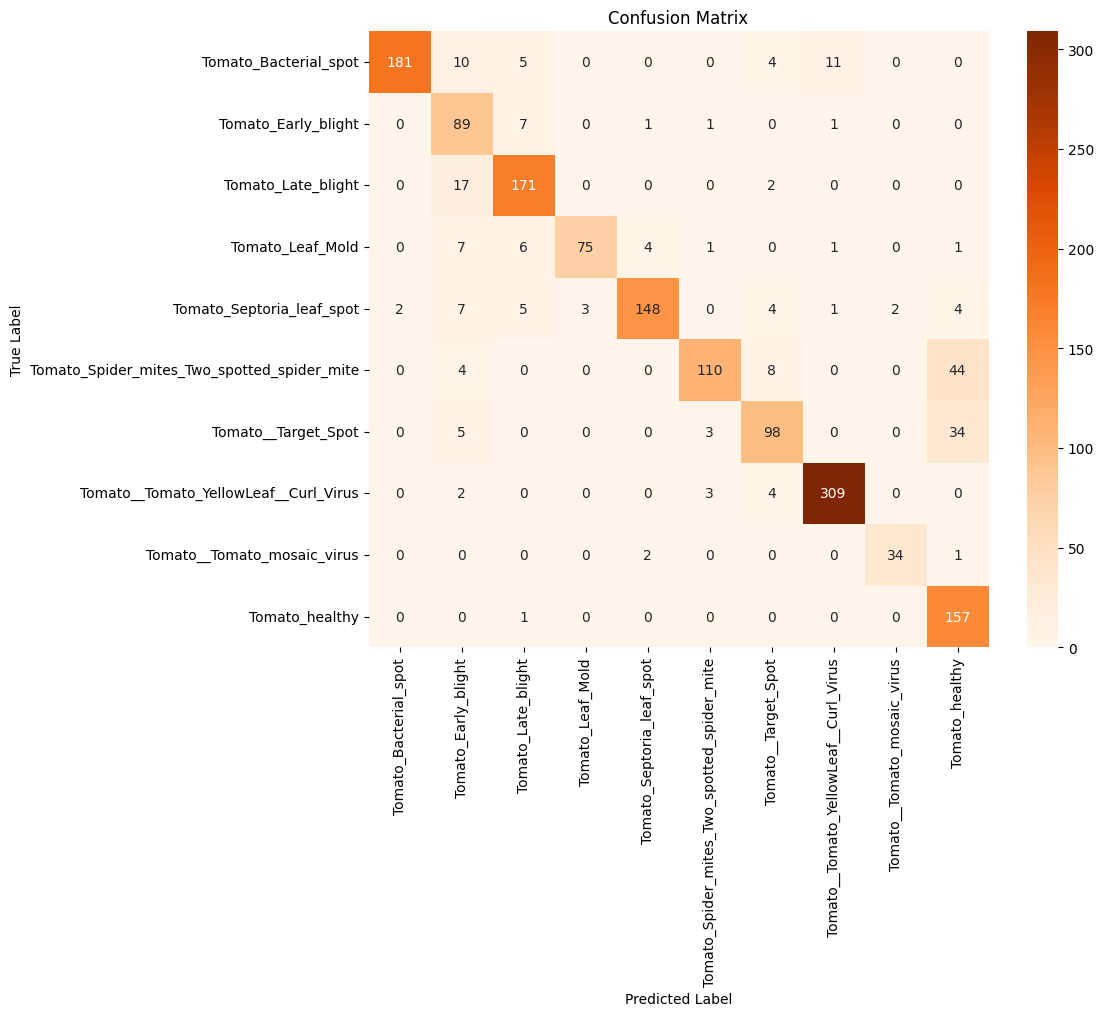


📊 Classification Metrics:
✅ Accuracy:  86.29%
✅ Precision: 88.58%
✅ Recall:    86.29%
✅ F1-score:  86.50%

🔎 Detailed Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.99      0.86      0.92       211
                        Tomato_Early_blight       0.63      0.90      0.74        99
                         Tomato_Late_blight       0.88      0.90      0.89       190
                           Tomato_Leaf_Mold       0.96      0.79      0.87        95
                  Tomato_Septoria_leaf_spot       0.95      0.84      0.89       176
Tomato_Spider_mites_Two_spotted_spider_mite       0.93      0.66      0.77       166
                        Tomato__Target_Spot       0.82      0.70      0.75       140
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.96      0.97      0.96       318
                Tomato__Tomato_mosaic_virus       0.94      0.92      0.93        37
                      

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# ============================
# 📈 1️⃣ Accuracy & Loss Graphs
# ============================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# ============================
# 🔍 2️⃣ Confusion Matrix & Metrics
# ============================

# Predictions
y_pred = model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=list(test_data.class_indices.keys()),
            yticklabels=list(test_data.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("\n📊 Classification Metrics:")
print(f"✅ Accuracy:  {accuracy * 100:.2f}%")
print(f"✅ Precision: {precision * 100:.2f}%")
print(f"✅ Recall:    {recall * 100:.2f}%")
print(f"✅ F1-score:  {f1 * 100:.2f}%\n")

print("🔎 Detailed Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys())))


In [ ]:
from tensorflow.keras.optimizers import Adam

opt_model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

opt_model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

opt_history = opt_model.fit(
    train_data,
    validation_data=test_data,
    epochs=60,
    batch_size=64
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 67s 176ms/step - accuracy: 0.4071 - loss: 1.7521 - val_accuracy: 0.7195 - val_loss: 0.8220
Epoch 2/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.7291 - loss: 0.7913 - val_accuracy: 0.6742 - val_loss: 1.0766
Epoch 3/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.8001 - loss: 0.5710 - val_accuracy: 0.8157 - val_loss: 0.6001
Epoch 4/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 162ms/step - accuracy: 0.8112 - loss: 0.5299 - val_accuracy: 0.8082 - val_loss: 0.6558
Epoch 5/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.8506 - loss: 0.4309 - val_accuracy: 0.8346 - val_loss: 0.5332
Epoch 6/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 57s 163ms/step - accuracy: 0.8648 - loss: 0.3923 - val_accuracy: 0.8553 - val_loss: 0.4690
Epoch 7/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 161ms/step - accuracy: 0.8642 - loss: 0.3785 - val_accuracy: 0.8145 - val_loss: 0.6722
Epoch 8/60
351/351 ━━━━━━━━━━━━━━━━━━━━ 56s 159ms/step - accuracy: 0.8775 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"\n Optimized Test Accuracy: {test_acc*100:.2f}%")

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8494 - loss: 0.5698

 Optimized Test Accuracy: 86.29%


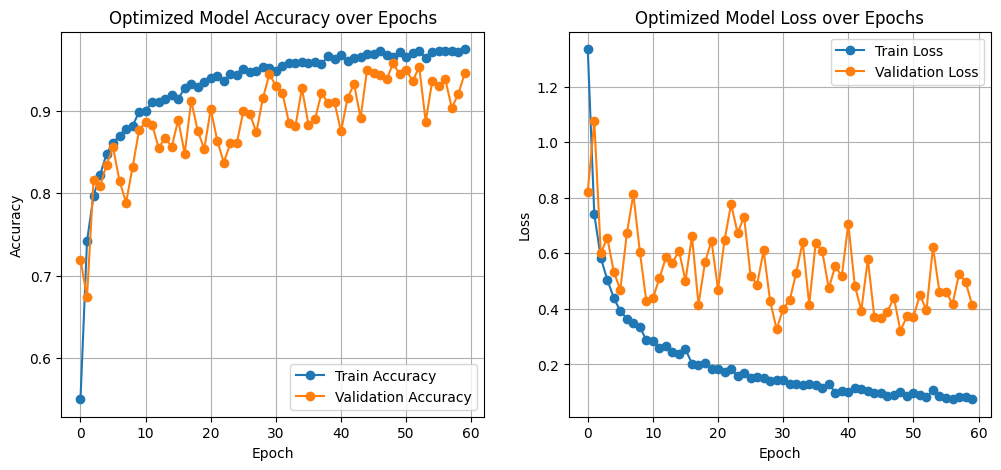

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step


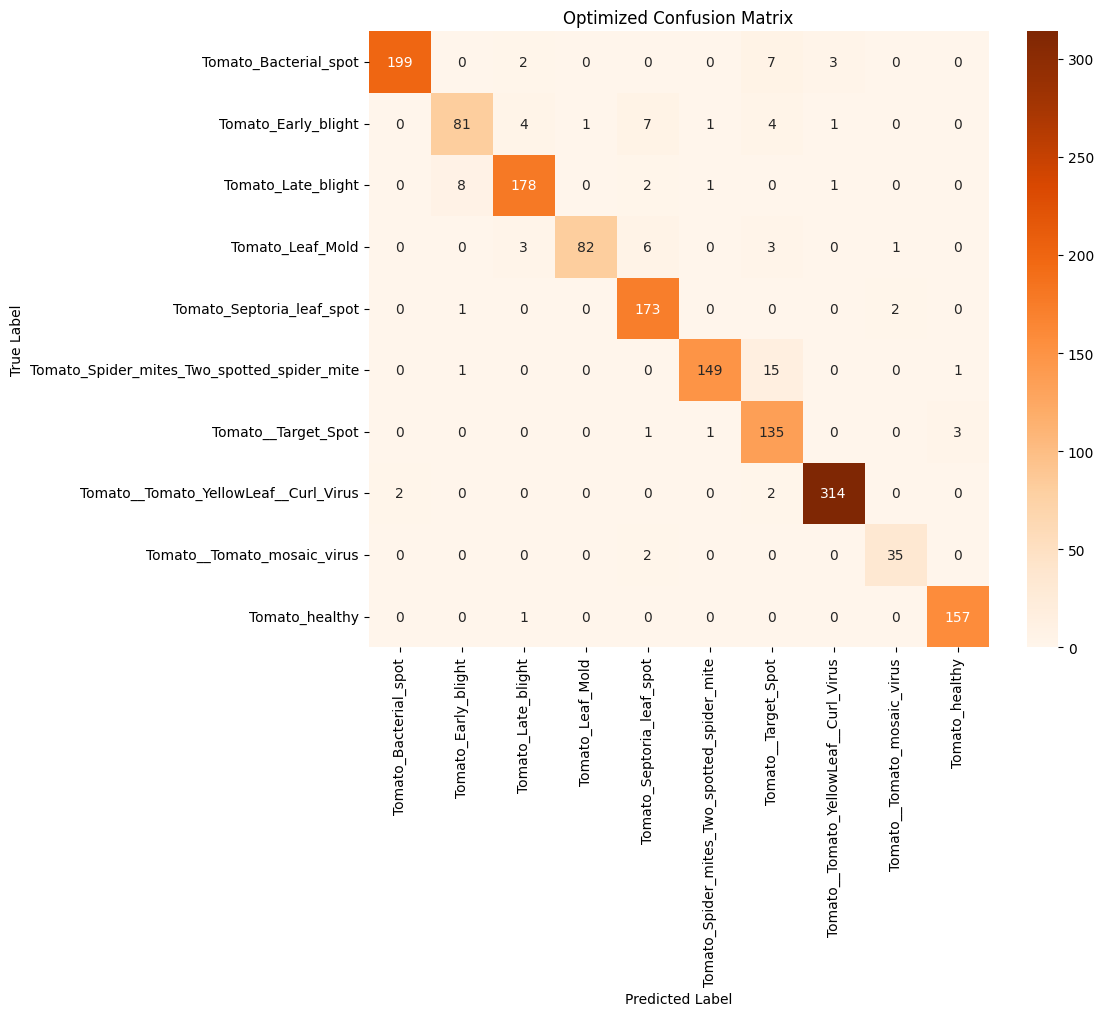


📊 Optimized Classification Metrics:
✅ Accuracy:  94.53%
✅ Precision: 94.84%
✅ Recall:    94.53%
✅ F1-score:  94.55%

🔎 Detailed Report:
                                             precision    recall  f1-score   support

                      Tomato_Bacterial_spot       0.99      0.94      0.97       211
                        Tomato_Early_blight       0.89      0.82      0.85        99
                         Tomato_Late_blight       0.95      0.94      0.94       190
                           Tomato_Leaf_Mold       0.99      0.86      0.92        95
                  Tomato_Septoria_leaf_spot       0.91      0.98      0.94       176
Tomato_Spider_mites_Two_spotted_spider_mite       0.98      0.90      0.94       166
                        Tomato__Target_Spot       0.81      0.96      0.88       140
      Tomato__Tomato_YellowLeaf__Curl_Virus       0.98      0.99      0.99       318
                Tomato__Tomato_mosaic_virus       0.92      0.95      0.93        37
            

In [ ]:
# ============================
# 📈 1️⃣ Accuracy & Loss Graphs
# ============================
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(opt_history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(opt_history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Optimized Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1,2,2)
plt.plot(opt_history.history['loss'], label='Train Loss', marker='o')
plt.plot(opt_history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Optimized Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show()

# ============================
# 🔍 2️⃣ Confusion Matrix & Metrics
# ============================

# Predictions
y_pred = opt_model.predict(test_data)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_data.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=list(test_data.class_indices.keys()),
            yticklabels=list(test_data.class_indices.keys()))
plt.title('Optimized Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Metrics
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='weighted')
recall = recall_score(y_true, y_pred_classes, average='weighted')
f1 = f1_score(y_true, y_pred_classes, average='weighted')

print("\n📊 Optimized Classification Metrics:")
print(f"✅ Accuracy:  {accuracy * 100:.2f}%")
print(f"✅ Precision: {precision * 100:.2f}%")
print(f"✅ Recall:    {recall * 100:.2f}%")
print(f"✅ F1-score:  {f1 * 100:.2f}%\n")

print("🔎 Detailed Report:")
print(classification_report(y_true, y_pred_classes, target_names=list(test_data.class_indices.keys())))

In [ ]:
opt_model.save("tomato_disease_model_final.keras")
print("Model saved successfully in .keras format!")


Model saved successfully in .keras format!


In [ ]:
from tensorflow.keras.models import load_model
model = load_model("tomato_disease_model_final.keras")


In [ ]:
import streamlit as st
from pyngrok import ngrok

print("Streamlit version:", st.__version__)
print("Pyngrok version:", ngrok.__version__)


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
from pyngrok import ngrok

!ngrok config add-authtoken 34WlE5b7M6M10bL3fo8KxdxpBRc_2EgtRaVx9gZyGw9KFuZE5

ModuleNotFoundError: No module named 'pyngrok'

In [ ]:
public_url = ngrok.connect(8501)
print("🌍 Streamlit URL:", public_url)


🌍 Streamlit URL: NgrokTunnel: "https://unhinderably-boreal-mikayla.ngrok-free.dev" -> "http://localhost:8501"


In [ ]:
!python --version


Python 3.10.12
